ああああ

In [1]:
# セル 1: 必要なライブラリをインポートしてデータを取得
import pandas as pd
import io

# USGS CSV (過去30日)
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

# pandasで直接読み込む（requests不要）
data = pd.read_csv(url)

# 簡単な確認
print(f"データ件数: {len(data)}")
data.head()


データ件数: 7640


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-05T11:54:28.830Z,35.605667,-117.48967,6.7400,1.044691,ml,9.0,113.0,0.08003,0.15,...,2025-11-05T11:56:30.842Z,"17 km E of Ridgecrest, CA",earthquake,0.7,1.720000,0.226373,7.0,automatic,ci,ci
1,2025-11-05T11:54:28.830Z,35.605667,-117.48967,6.7400,1.160000,ml,9.0,113.0,0.08003,0.15,...,2025-11-05T11:56:31.112Z,"17 km E of Ridgecrest, CA",earthquake,0.7,1.720000,0.168000,3.0,automatic,ci,ci
2,2025-11-05T11:18:17.587Z,64.157900,-147.93130,11.2000,1.100000,ml,NaN,NaN,NaN,0.27,...,2025-11-05T11:20:25.985Z,"59 km ENE of Ferry, Alaska",earthquake,NaN,0.600000,NaN,NaN,automatic,ak,ak
3,2025-11-05T11:13:27.366Z,65.091400,-141.32550,16.7000,2.100000,ml,NaN,NaN,NaN,0.91,...,2025-11-05T11:16:14.123Z,"34 km N of Eagle, Alaska",earthquake,NaN,0.800000,NaN,NaN,automatic,ak,ak
4,2025-11-05T11:09:14.712Z,30.743000,-103.66500,6.9074,1.600000,ml,6.0,212.0,0.30000,1.00,...,2025-11-05T11:14:38.852Z,"27 km SSE of Balmorhea, Texas",earthquake,0.0,14.588511,0.800000,4.0,automatic,tx,tx


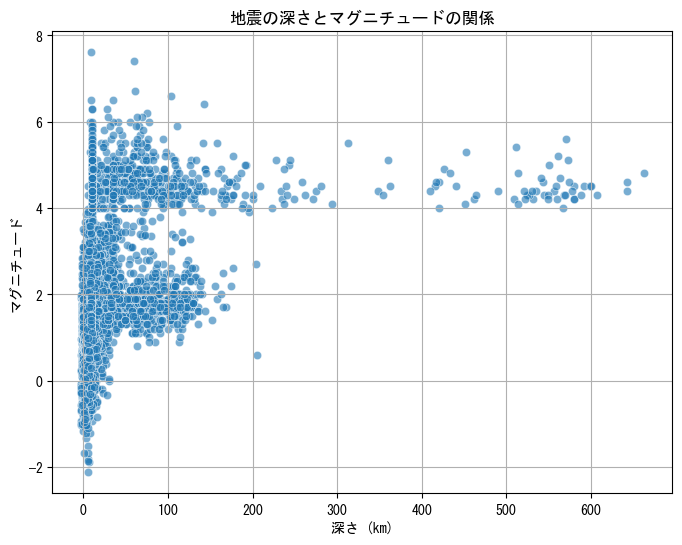

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 日本語フォント（Windows）
matplotlib.rcParams['font.family'] = 'MS Gothic'

# データ取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)

# 散布図（深さ vs マグニチュード）
plt.figure(figsize=(8,6))
sns.scatterplot(x="depth", y="mag", data=data, alpha=0.6)

plt.title("地震の深さとマグニチュードの関係")
plt.xlabel("深さ (km)")
plt.ylabel("マグニチュード")
plt.grid(True)
plt.show()


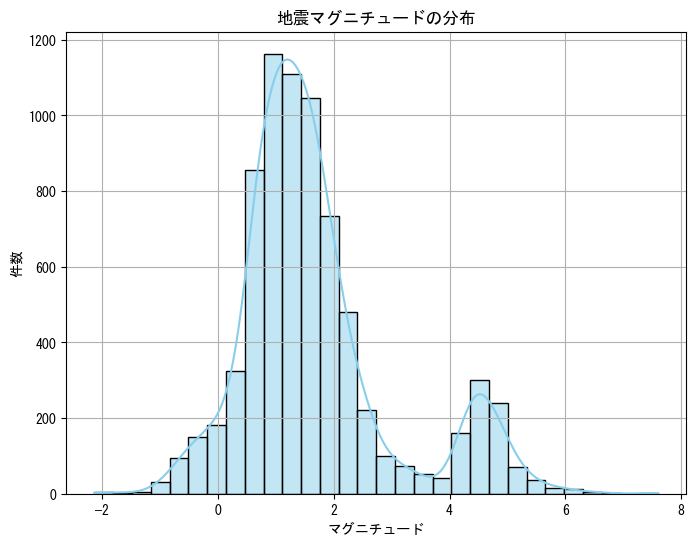

In [35]:
# @hide

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 日本語フォント設定
matplotlib.rcParams['font.family'] = 'MS Gothic'

# データ取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)

# マグニチュードのヒストグラム
plt.figure(figsize=(8,6))
sns.histplot(data["mag"].dropna(), bins=30, kde=True, color="skyblue")

plt.title("地震マグニチュードの分布")
plt.xlabel("マグニチュード")
plt.ylabel("件数")
plt.grid(True)
plt.show()


In [13]:
# セル 2: マグニチュードと深さの相関係数を計算
# 'mag' がマグニチュード, 'depth' が深さ（km）
corr = data['mag'].corr(data['depth'])
print(f"マグニチュードと深さの相関係数: {corr:.3f}")


マグニチュードと深さの相関係数: 0.384


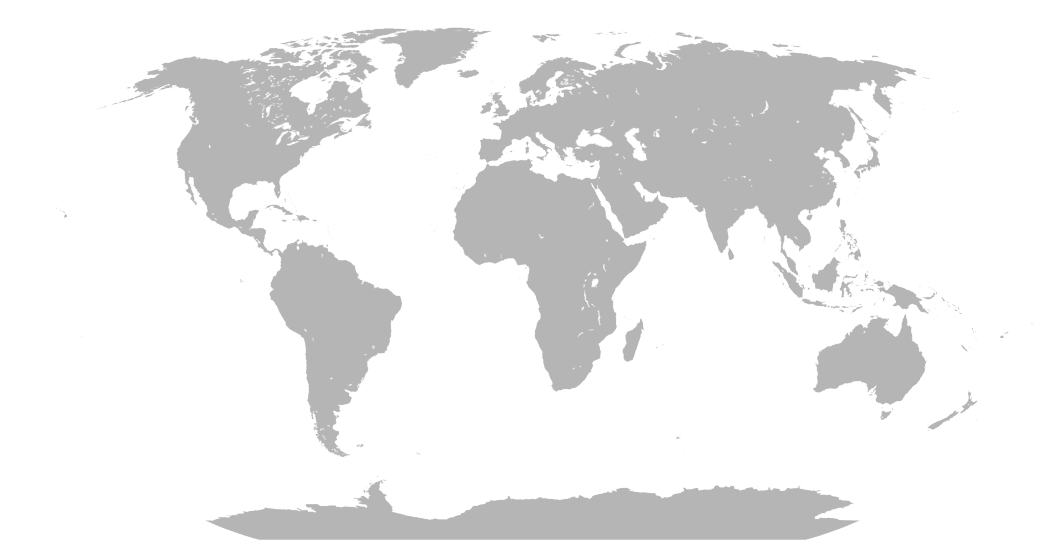

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 画像を読み込む
img = mpimg.imread('world_map.png')

# 表示
plt.figure(figsize=(14,7))
plt.imshow(img)
plt.axis('off')  # 軸を非表示
plt.show()


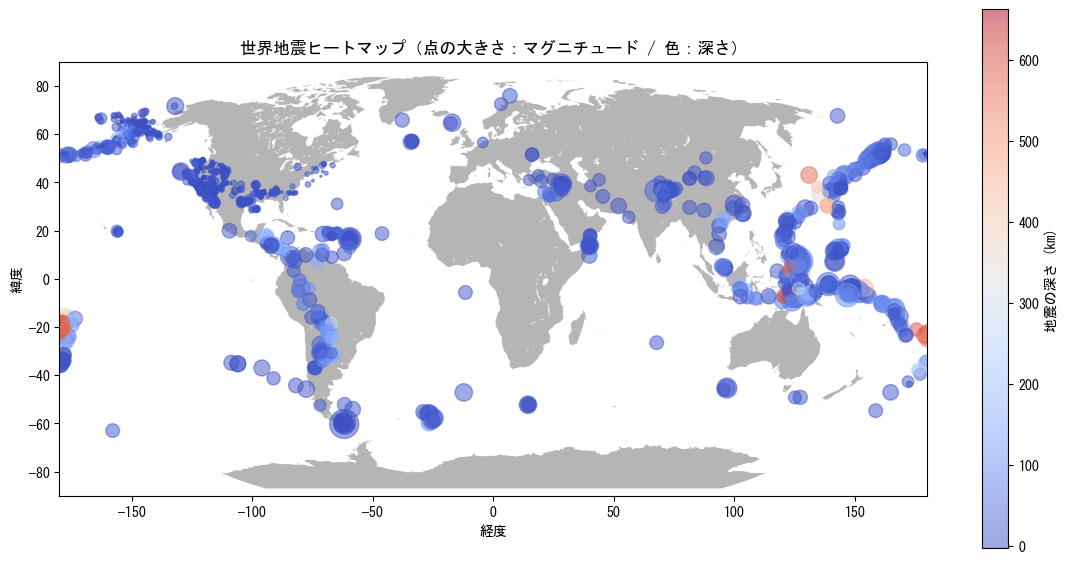

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 画像を読み込む
img = mpimg.imread('world_map.png')

# 緯度・経度・マグニチュード・深さのデータ
lons = data['longitude']
lats = data['latitude']
mags = data['mag'].fillna(0)         # NaNを0に
depths = data['depth'].fillna(0)     # 深さもNaNを0に

# 点のサイズにマグニチュードを反映（強調したいので3乗）
sizes = mags**3

# 深さを色で表現（浅いほど赤、深いほど青）
colors = depths

plt.figure(figsize=(14,7))
plt.imshow(img, extent=[-180,180,-90,90])  # 画像を緯度経度に合わせる
plt.scatter(lons, lats, s=sizes, c=colors, cmap='coolwarm', alpha=0.5)

plt.colorbar(label='地震の深さ (km)')
plt.xlabel("経度")
plt.ylabel("緯度")
plt.title("世界地震ヒートマップ（点の大きさ：マグニチュード / 色：深さ）")
plt.show()



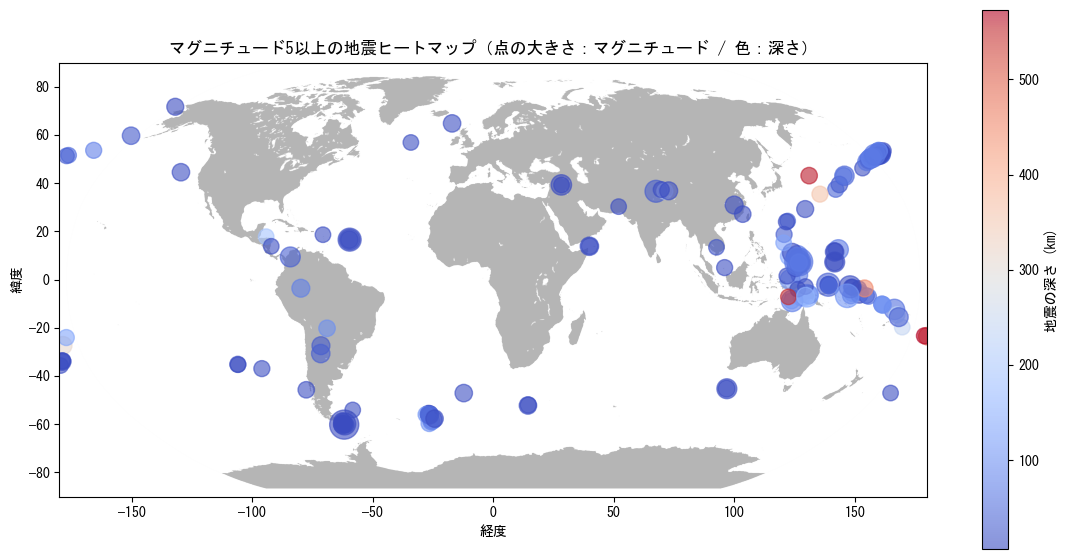

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 画像を読み込む
img = mpimg.imread('world_map.png')

# 緯度・経度・マグニチュード・深さ
lons = data['longitude']
lats = data['latitude']
mags = data['mag'].fillna(0)
depths = data['depth'].fillna(0)

# マグニチュード5以上のみ抽出
mask = mags >= 5
lons = lons[mask]
lats = lats[mask]
mags = mags[mask]
depths = depths[mask]

# 点のサイズにマグニチュードを反映（強調のため3乗）
sizes = mags**3

# 深さを色で表現（浅い赤～深い青）
colors = depths

plt.figure(figsize=(14,7))
plt.imshow(img, extent=[-180,180,-90,90])  # 画像を緯度経度に合わせる
plt.scatter(lons, lats, s=sizes, c=colors, cmap='coolwarm', alpha=0.6)

plt.colorbar(label='地震の深さ (km)')
plt.xlabel("経度")
plt.ylabel("緯度")
plt.title("マグニチュード5以上の地震ヒートマップ（点の大きさ：マグニチュード / 色：深さ）")
plt.show()


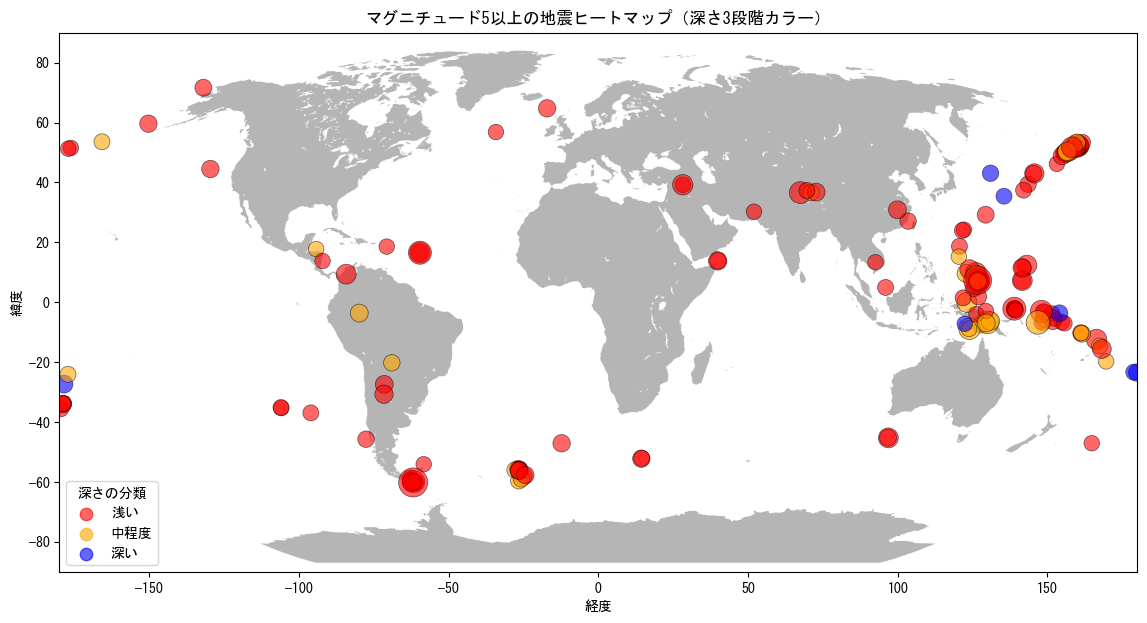

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 画像を読み込み
img = mpimg.imread('world_map.png')

# 緯度・経度・マグニチュード・深さ
lons = data['longitude']
lats = data['latitude']
mags = data['mag'].fillna(0)
depths = data['depth'].fillna(0)

# --- マグニチュード5以上のデータだけ抽出 ---
mask = mags >= 5
lons = lons[mask]
lats = lats[mask]
mags = mags[mask]
depths = depths[mask]

# --- 深さを3段階に分類 ---
# 浅い: 0〜70km, 中程度: 70〜300km, 深い: 300km以上
depth_category = []
for d in depths:
    if d < 70:
        depth_category.append('浅い')
    elif d < 300:
        depth_category.append('中程度')
    else:
        depth_category.append('深い')

# カラー設定
color_map = {'浅い': 'red', '中程度': 'orange', '深い': 'blue'}
colors = [color_map[c] for c in depth_category]

# マグニチュードで点のサイズを変化
sizes = mags**3

plt.figure(figsize=(14,7))
plt.imshow(img, extent=[-180,180,-90,90])
plt.scatter(lons, lats, s=sizes, c=colors, alpha=0.6, edgecolors='k', linewidths=0.5)

# 凡例
for label, color in color_map.items():
    plt.scatter([], [], c=color, alpha=0.6, s=80, label=label)
plt.legend(title="深さの分類", loc='lower left')

plt.xlabel("経度")
plt.ylabel("緯度")
plt.title("マグニチュード5以上の地震ヒートマップ（深さ3段階カラー）")
plt.show()


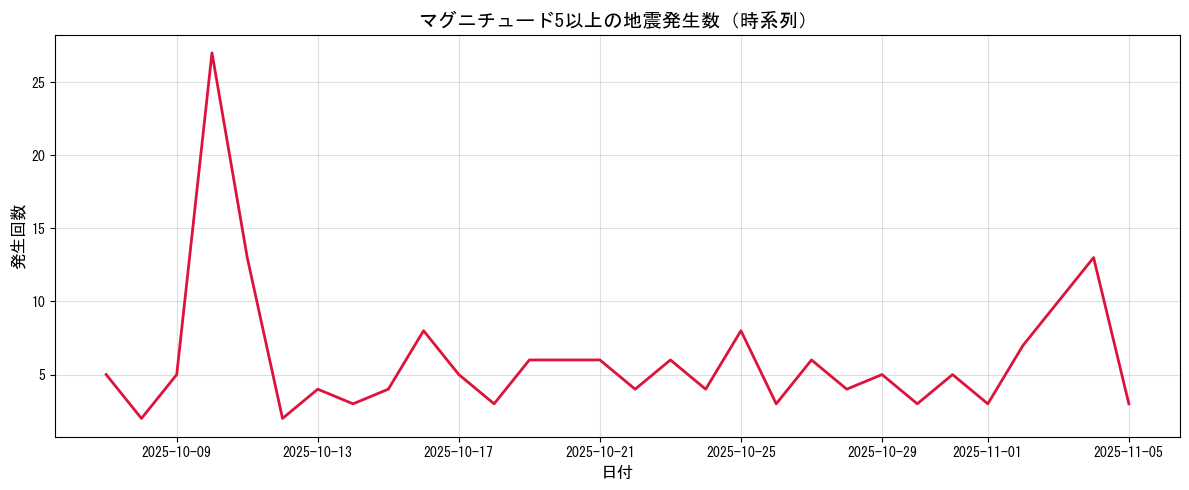

In [31]:
# セル: 時系列トレンド分析（マグニチュード5以上）

import pandas as pd
import matplotlib.pyplot as plt

# "time"列を日時型に変換
data['time'] = pd.to_datetime(data['time'], errors='coerce')

# マグニチュード5以上を抽出
data_m5 = data[data['mag'] >= 5]

# 日ごとの地震回数を集計
trend = data_m5.groupby(data_m5['time'].dt.date).size()

# グラフ描画
plt.figure(figsize=(12, 5))
plt.plot(trend.index, trend.values, color='crimson', linewidth=2)
plt.title('マグニチュード5以上の地震発生数（時系列）', fontsize=14)
plt.xlabel('日付', fontsize=12)
plt.ylabel('発生回数', fontsize=12)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()
